## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
x = np.linspace(0,20,200)
x_data = np.c_[np.ones(x.shape[0]), x]
# x

In [3]:
y = -2*x +1
# y

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [4]:
def gradient(x,y,alpha=0.0148,iterations=1000):
    theta  = [0,0]
    losses = []
    thetas=[]
    gradient = 10
    for i in range(iterations):
        pred = np.dot(x,theta)
        error = pred-y
        losses.append( 1/(2*len(x)) * np.dot(error.T, error))
        thetas.append(theta)
        gradient = (1/len(x)) * np.dot(x.T, error)
        theta -= (alpha * gradient)
    return thetas,losses

#### Try your function with any input parameterss of your choice.

In [5]:
thetas,losses = gradient(x_data,y)

#### Calculate r2 score

In [6]:
from sklearn.metrics import r2_score
y_pred = np.dot(x_data,thetas[-1].T)

In [7]:
r2_score(y, y_pred)

0.9999985442292576

#### Plot loss vs. epochs

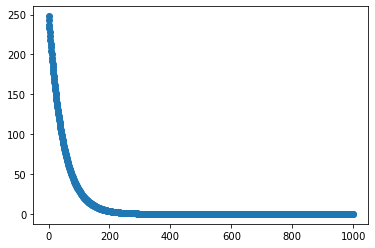

In [8]:
x_axis = np.arange(len(losses))
plt.scatter(x_axis,losses)

In [9]:
_thetas= np.array(thetas)
print(_thetas[-1,0])
print(_thetas[-1,1])

0.9721232744410772
-1.9978659522335172


#### Plot Theta_0 vs. loss and Theta_1 vs. loss

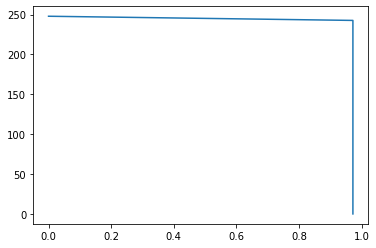

In [10]:
#theta0 vs loss
plt.plot(_thetas[:,0],losses)

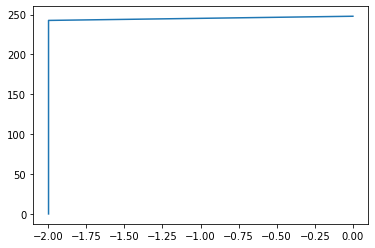

In [11]:
#theta1 vs loss
plt.plot(_thetas[:,1],losses)

#### Plot all regression lines till converge

In [12]:
y_pred = np.dot(x_data,thetas[-1].T)
# y_pred

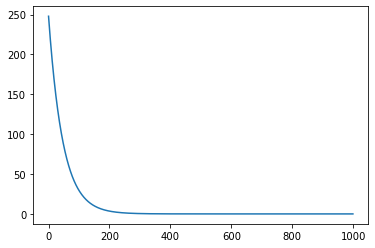

In [13]:
plt.plot(losses)
plt.show()

In [14]:
print(thetas[-1][0])
print(thetas[-1][1])

0.9721232744410772
-1.9978659522335172


In [15]:
import matplotlib.animation as animation
fig = plt.figure()
ax = plt.axes()
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x, y_pred, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
plt.close()

#Generate the animation data,
def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation

# animation function.  This is called sequentially
def animate(i):
    x_ = np.linspace(0, 20, len(x))
    y_ = thetas[i*50][1]*x + thetas[i*50][0]
    line.set_data(x_, y_)
    annotation.set_text('Cost = %.2f e10' % (losses[i]))
    return line, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=int(len(thetas)/50), interval=0, blit=True)

anim.save('animation.gif', writer='imagemagick', fps = 10)

MovieWriter imagemagick unavailable; using Pillow instead.



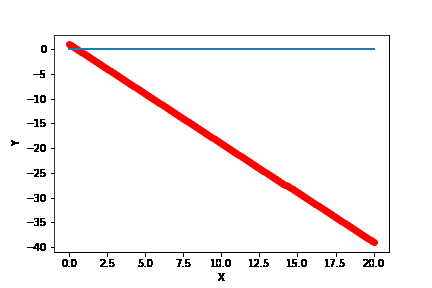

In [16]:
#Display the animation...
import io
import base64
from IPython.display import HTML

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))


#### Plot the best regression line

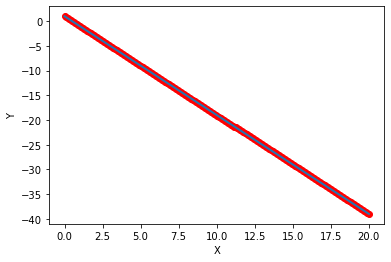

In [17]:
fig = plt.figure()
ax = plt.axes()
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x, y_pred, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
x_line = x#np.linspace(0, 5, 20)
y_line = thetas[-1][1]*x_line + thetas[-1][0]
line.set_data(x_line, y_line)
plt.show()

#### Update the implementation of the Batch GD to be Mini-Batch and rpeat the above plots and evaluations
#### Change batch size and see the effect

In [18]:
def gradient_mini_batch(x,y,alpha=0.0001,iterations=1000,batch_size =0 ):
    if batch_size <= 0 or batch_size > len(x):
        batch_size=len(x)
#     print(batch_size)
    theta  = [0,0]
    losses = []
    thetas=[]
    _x=np.array(x)
    _y=np.array(y)
    for i in range(iterations):
        for i1 in range(int(len(x)/batch_size)):
            for i2 in range(batch_size):
                tmp_x = _x[i1*batch_size:batch_size*(i1+1)]
                tmp_y = _y[i1*batch_size:batch_size*(i1+1)]
                if batch_size*(i1+1) < len(x):
                    tmp_x = _x[i1*batch_size:]
                    tmp_y = _y[i1*batch_size:]
                    
                pred = np.dot(tmp_x,theta)
                error = pred-tmp_y
                losses.append( 1/(2*len(tmp_x)) * np.dot(error.T, error))
                thetas.append(theta)
                theta -= (alpha * (1/len(tmp_x)) * np.dot(tmp_x.T, error)) 
    return thetas,losses

### mini batch batch size 8

In [19]:
thetas,losses = gradient_mini_batch(x_data,y,batch_size=8)
_thetas=np.array(thetas)

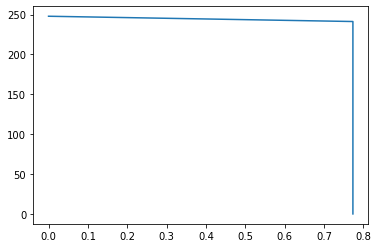

In [20]:
#theta1 vs loss batch size 8
plt.plot(_thetas[:,0],losses)

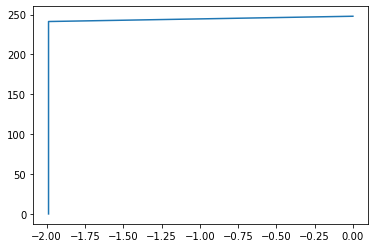

In [21]:
#theta2 vs loss batch size 8
plt.plot(_thetas[:,1],losses)

### mini batch batch size 16

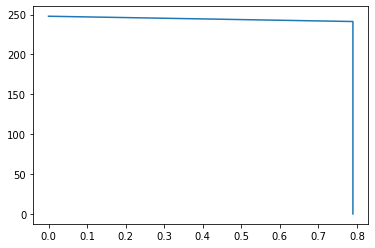

In [22]:
#theta1 vs loss batch size = 16
thetas,losses = gradient_mini_batch(x_data,y,batch_size=16)
_thetas=np.array(thetas)
plt.plot(_thetas[:,0],losses)

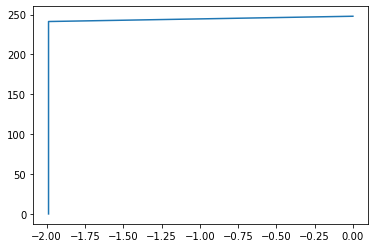

In [23]:
#theta2 vs loss batch size 16
plt.plot(_thetas[:,1],losses)

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD

In [24]:
def stochastic_gradient(x,y,alpha=0.001,iterations=1000):
    theta  = [0,0]
    losses = []
    thetas=[]
    _x=np.array(x)
    _y=np.array(y)
    for i in range(iterations):
        for sample in range(len(x)):
            pred = theta[0] + x[sample]*theta[1]
            error = pred-y[sample]
            losses.append(error**2)
            
            thetas.append(theta)
            theta = [(theta[0] - alpha*error) ,(theta[1] - alpha * x[sample]*error )]
    return thetas,losses

### Using stochastic gradient descent with learning rate = 0.001

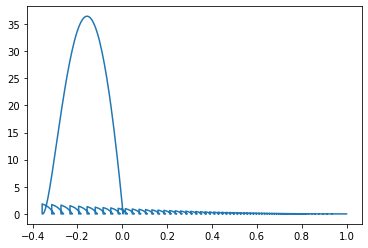

In [25]:
#theta1 vs loss
thetas,losses = stochastic_gradient(x,y)
_thetas=np.array(thetas)
plt.plot(_thetas[:,0],losses)

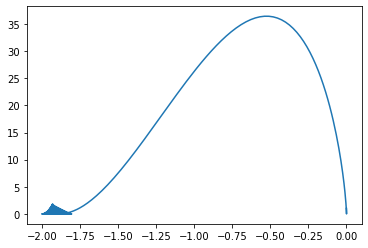

In [26]:
#stochastic gradient descent
#theta1 vs loss
_thetas=np.array(thetas)
plt.plot(_thetas[:,1],losses)

In [ ]:
fig = plt.figure()
ax = plt.axes()
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x, y_pred, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
x_line = x#np.linspace(0, 5, 20)
y_line = thetas[-1][1]*x_line + thetas[-1][0]
line.set_data(x_line, y_line)
plt.show()

### Using stochastic gradient descent with learning rate = 0.002

In [ ]:

#theta1 vs loss
thetas,losses = stochastic_gradient(x,y,alpha=0.002)
_thetas=np.array(thetas)
plt.plot(_thetas[:,0],losses)

In [ ]:
#stochastic gradient descent
#theta1 vs loss
_thetas=np.array(thetas)
plt.plot(_thetas[:,1],losses)

In [ ]:
fig = plt.figure()
ax = plt.axes()
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x, y_pred, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
x_line = x#np.linspace(0, 5, 20)
y_line = thetas[-1][1]*x_line + thetas[-1][0]
line.set_data(x_line, y_line)
plt.show()

### Using stochastic gradient descent with learning rate = 0.005

In [ ]:
#using batch size = 1 will lead = stochastic gradient descent , learning rate = 0.005
#theta1 vs loss
thetas,losses = stochastic_gradient(x,y,alpha=0.005)
_thetas=np.array(thetas)
plt.plot(_thetas[:,0],losses)

In [ ]:
#stochastic gradient descent
#theta1 vs loss
_thetas=np.array(thetas)
plt.plot(_thetas[:,1],losses)

In [ ]:
fig = plt.figure()
ax = plt.axes()
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x, y_pred, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
x_line = x#np.linspace(0, 5, 20)
y_line = thetas[-1][1]*x_line + thetas[-1][0]
line.set_data(x_line, y_line)
plt.show()

### Using stochastic gradient descent with learning rate = 0.009

In [ ]:
#theta1 vs loss
thetas,losses = stochastic_gradient(x,y,alpha=0.009)
_thetas=np.array(thetas)
plt.plot(_thetas[:,0],losses)

In [ ]:
#stochastic gradient descent
#theta1 vs loss
_thetas=np.array(thetas)
plt.plot(_thetas[:,1],losses)

In [ ]:
fig = plt.figure()
ax = plt.axes()
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x, y_pred, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
x_line = x#np.linspace(0, 5, 20)
y_line = thetas[-1][1]*x_line + thetas[-1][0]
line.set_data(x_line, y_line)
plt.show()

### Using stochastic gradient descent with learning rate = 0.01 will oscilate

In [ ]:
#theta1 vs loss
thetas,losses = stochastic_gradient(x,y,alpha=0.01)
_thetas=np.array(thetas)
plt.plot(_thetas[:,0],losses)

In [ ]:
#stochastic gradient descent
#theta1 vs loss
_thetas=np.array(thetas)
plt.plot(_thetas[:,1],losses)

In [ ]:
fig = plt.figure()
ax = plt.axes()
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x, y_pred, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
x_line = x#np.linspace(0, 5, 20)
y_line = thetas[-1][1]*x_line + thetas[-1][0]
line.set_data(x_line, y_line)
plt.show()